In [1]:
import os

import numpy as np  # numerical library
import xarray as xr  # netCDF library
import pandas as pd

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cartopy.feature as cfeature

import cftime

In [2]:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [3]:
#To compute de climatoloy
yearC1='2000'
yearC2='2010'

In [4]:
Titulos = ['Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria', 
           'Demarcación sudatlántica','Demarcación Estrecho y Alborán']
Titulos_short = ['LEB', 'NOR','CAN','SUD','ESA']

In [5]:
HOME=os.environ['HOME']   
f = open(HOME+'/.env', 'r')
for line in f.readlines():
    Name=line.strip().split('=')[0]
    Content=line.strip().split('=')[-1]
    if Name=='dirData' or Name=='dirAnalisis':
        exec(Name + "=" + "'" + Content + "'")
f.close()

In [35]:
base_file1 = dirData + '/Climatologias/Glorys/cmems_mod_glo_phy_my_0.083_P1M-m_202311/'
base_file2 = dirData + '/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/'
dataDir    = dirAnalisis + '/IEOOSWebPage/data'
imageDir   = dirAnalisis + '/IEOOSWebPage/images'

In [165]:
i=4
titulo = Titulos[i]
titulo_short = Titulos_short[i]

In [166]:
# Load the data from the .txt file
longDem, latiDem = [], []
with open('./LimiteDemarcaciones/Demarcacion'+titulo_short+'.txt', 'r') as f:
    for line in f:
        # Split the line by whitespace and append the values
        longitude, latitude = map(float, line.split())
        longDem.append(longitude)
        latiDem.append(latitude)

## Read the data

In [167]:
files = []

for iy in range(2000,2021):
    for im in range(1,13):
        files.append(base_file1+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

for iy in range(2021,2022):
    for im in range(1,7):
        files.append(base_file1+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

for iy in range(2021,2022):
    for im in range(7,13):
        files.append(base_file2+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

for iy in range(2022,2024):
    for im in range(1,13):
        files.append(base_file2+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

In [168]:
DC = xr.open_mfdataset(files)

In [169]:
DC = DC.drop_vars("mlotst").drop_vars("zos")
DC = DC.drop_vars("sithick").drop_vars("siconc")
DC = DC.drop_vars("usi").drop_vars("vsi").drop_vars("uo").drop_vars("vo").drop_vars("bottomT")

In [175]:
if titulo_short == 'LEB':
        slicelatitude=slice(35.5,42.75)
        slicelongitude=slice(358-360,368-360)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        print('>>>>> '+titulo)        

elif  titulo_short == 'NOR':
        slicelatitude=slice(41.5,46.9)
        slicelongitude=slice(346-360,-1.5)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        print('>>>>> '+titulo)        
        
elif  titulo_short == 'CAN':
        slicelatitude=slice(24.3,32.5)
        slicelongitude=slice(336-360,350-360)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        print('>>>>> '+titulo)

elif  titulo_short == 'SUD':
        slicelatitude=slice(35.5,37.5)
        slicelongitude=slice(352-360,354.5-360)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        print('>>>>> '+titulo)

elif  titulo_short == 'ESA':
        slicelatitude=slice(35.5,37)
        slicelongitude=slice(354-360,358.5-360)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude).load()

print('>>>>> '+titulo)

>>>>> Demarcación Estrecho y Alborán


In [176]:
meanTemp=DC_temp.mean('time').sel(depth=10, method='nearest')

In [177]:
meanTemp

<xarray.DataArray 'thetao' (latitude: 19, longitude: 55)> Size: 8kB
array([[18.45478937,         nan,         nan, ..., 19.32906583,
        19.32217628, 19.3188523 ],
       [18.33351645,         nan,         nan, ..., 19.33065279,
        19.31873786, 19.30441959],
       [18.7449619 ,         nan,         nan, ..., 19.34246854,
        19.33015432, 19.30859808],
       ...,
       [        nan,         nan,         nan, ..., 19.06002991,
        19.08948536, 19.12510554],
       [        nan,         nan,         nan, ..., 19.10058901,
        19.12324646, 19.15524512],
       [        nan,         nan,         nan, ..., 19.1585284 ,
        19.16830195, 19.19419182]])
Coordinates:
  * longitude  (longitude) float32 220B -6.0 -5.917 -5.833 ... -1.583 -1.5
  * latitude   (latitude) float32 76B 35.5 35.58 35.67 ... 36.83 36.92 37.0
    depth      float32 4B 9.573

In [178]:
niveles=np.arange(np.floor(meanTemp.min()).values,
                  np.ceil(meanTemp.max()).values,0.1)

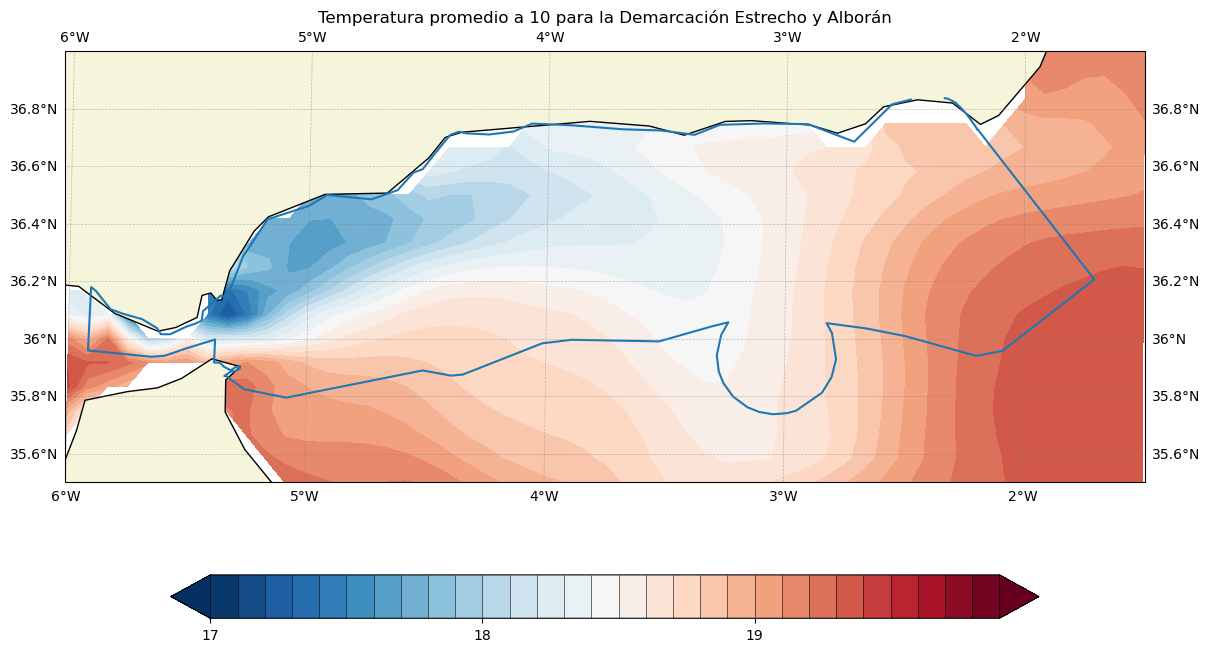

In [179]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

cm = ax.contourf(meanTemp.longitude,meanTemp.latitude,meanTemp, levels=niveles, 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = niveles[0],vmax = niveles[-1],extend='both')

land = cartopy.feature.NaturalEarthFeature('physical', 'land', edgecolor='k', scale = '50m' ,
        facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
    

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=np.arange(niveles[0],niveles[-1],1), 
                  drawedges=True)

ax.plot(longDem, latiDem, transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=.5,color='gray', alpha=0.5, linestyle='--')
ax.set_title('Temperatura promedio a '+'10 '+'para la '+titulo);

plt.savefig(imageDir+'/'+titulo_short+'_temp_promedio'+'10'+'.png')

In [180]:
prof_mean_temp = DC_temp.stack(flat_dim=('longitude', 'latitude','time')).mean('flat_dim')
prof_std_temp  = DC_temp.stack(flat_dim=('longitude', 'latitude','time')).std('flat_dim')

prof_mean_salt = DC_salt.stack(flat_dim=('longitude', 'latitude','time')).mean('flat_dim')
prof_std_salt  = DC_salt.stack(flat_dim=('longitude', 'latitude','time')).std('flat_dim')

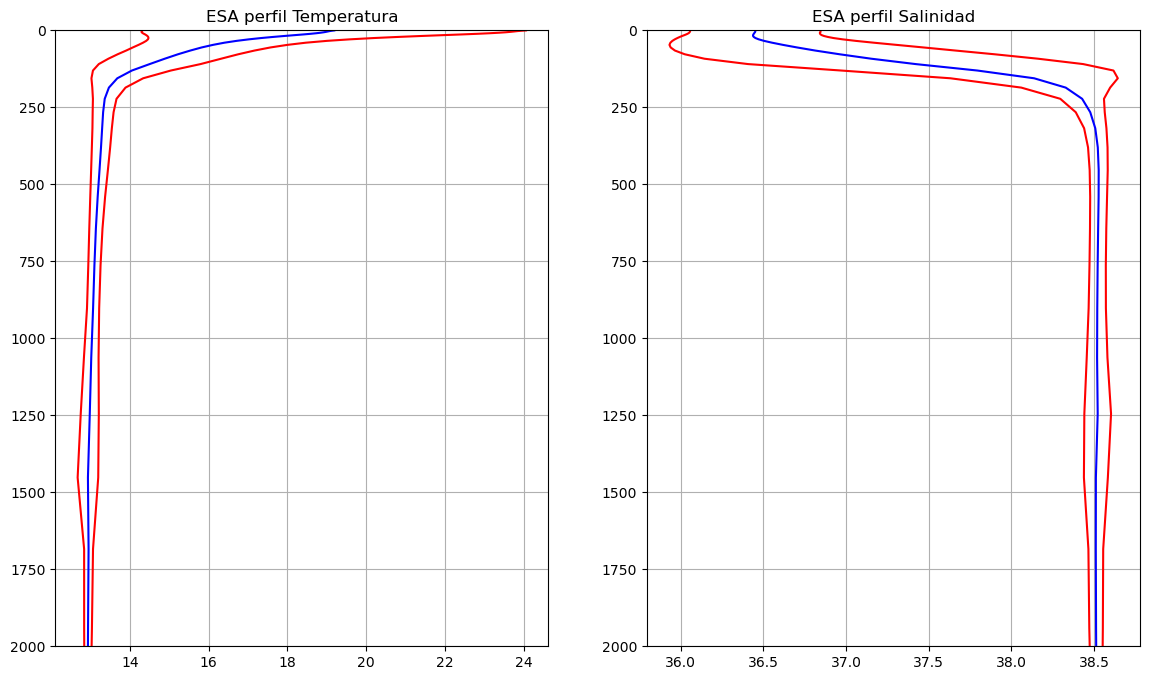

In [181]:
fig,ax= plt.subplots(1,2,figsize=(14,8))

#ax[0].plot(DC_temp.stack(flat_dim=('longitude', 'latitude','time')),DC_temp.depth, color='lightgrey')
ax[0].plot(prof_mean_temp,prof_mean_temp.depth,color='blue')  
ax[0].plot(prof_mean_temp+1.5*prof_std_temp,prof_mean_temp.depth,color='red')  
ax[0].plot(prof_mean_temp-1.5*prof_std_temp,prof_mean_temp.depth,color='red')  
ax[0].invert_yaxis()
ax[0].set_ylim([2000,0]);
ax[0].grid()

#ax[1].plot(DC_salt.stack(flat_dim=('lon', 'lat','time')),DC_temp.depth, color='lightgrey')
ax[1].plot(prof_mean_salt,prof_mean_temp.depth,color='blue')  
ax[1].plot(prof_mean_salt+1.5*prof_std_salt,prof_mean_salt.depth,color='red')  
ax[1].plot(prof_mean_salt-1.5*prof_std_salt,prof_mean_salt.depth,color='red')  
ax[1].invert_yaxis()
ax[1].set_ylim([2000,0]);
ax[1].grid()

ax[0].set_title(titulo_short+' perfil Temperatura');
ax[1].set_title(titulo_short+' perfil Salinidad');

plt.savefig(imageDir+'/'+titulo_short+'_perfiles_T_S_promedio.png')

## Seasonal cycle

In [182]:
#Create monthly climatology
DC_temp_clim = DC_temp.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();

In [183]:
DC_salt_clim = DC_salt.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();

In [184]:
#Create anomaly
DC_temp_anom = DC_temp.groupby('time.month') - DC_temp_clim
DC_temp_anom.load();

In [185]:
DC_salt_anom = DC_salt.groupby('time.month') - DC_salt_clim
DC_salt_anom.load();

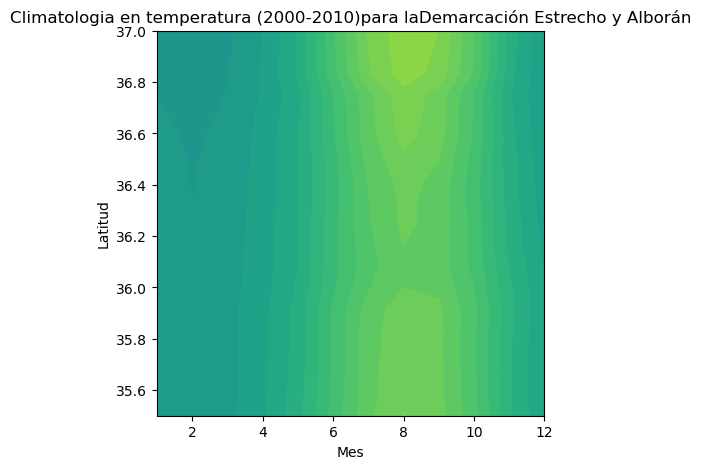

In [186]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(DC_temp_clim.mean(dim='longitude').sel(depth=10, method='nearest').month,
                 DC_temp_clim.mean(dim='longitude').sel(depth=10, method='nearest').latitude,
                 DC_temp_clim.mean(dim='longitude').sel(depth=10, method='nearest').transpose(),
            levels=12, vmin=-2, vmax=30)
ax.grid()

ax.set_ylabel('Latitud') 
ax.set_xlabel('Mes')
ax.set_title('Climatologia en temperatura (' + yearC1 + '-' + yearC2 + ')'+ 'para la'+titulo)
ax.grid()
plt.savefig(imageDir+'/'+titulo_short+'_climatologia_T_'+yearC1+'_'+yearC2+'.png')

# Weighted mean

In [187]:
weights = np.cos(np.deg2rad(DC.thetao.latitude))
weights = weights/weights.max()
weights.name = "weights"

In [188]:
DC_temp_weighted = DC_temp.weighted(weights)
DC_salt_weighted = DC_salt.weighted(weights)

In [189]:
DC_temp_anom_weighted = DC_temp_anom.weighted(weights)
DC_salt_anom_weighted = DC_salt_anom.weighted(weights)

In [190]:
DC_temp_wmean = DC_temp_weighted.mean(("longitude", "latitude"),skipna=True).load()
DC_salt_wmean = DC_salt_weighted.mean(("longitude", "latitude"),skipna=True).load()

In [191]:
DC_temp_anom_wmean = DC_temp_anom_weighted.mean(("longitude", "latitude"),skipna=True).load()
DC_salt_anom_wmean = DC_salt_anom_weighted.mean(("longitude", "latitude"),skipna=True).load()

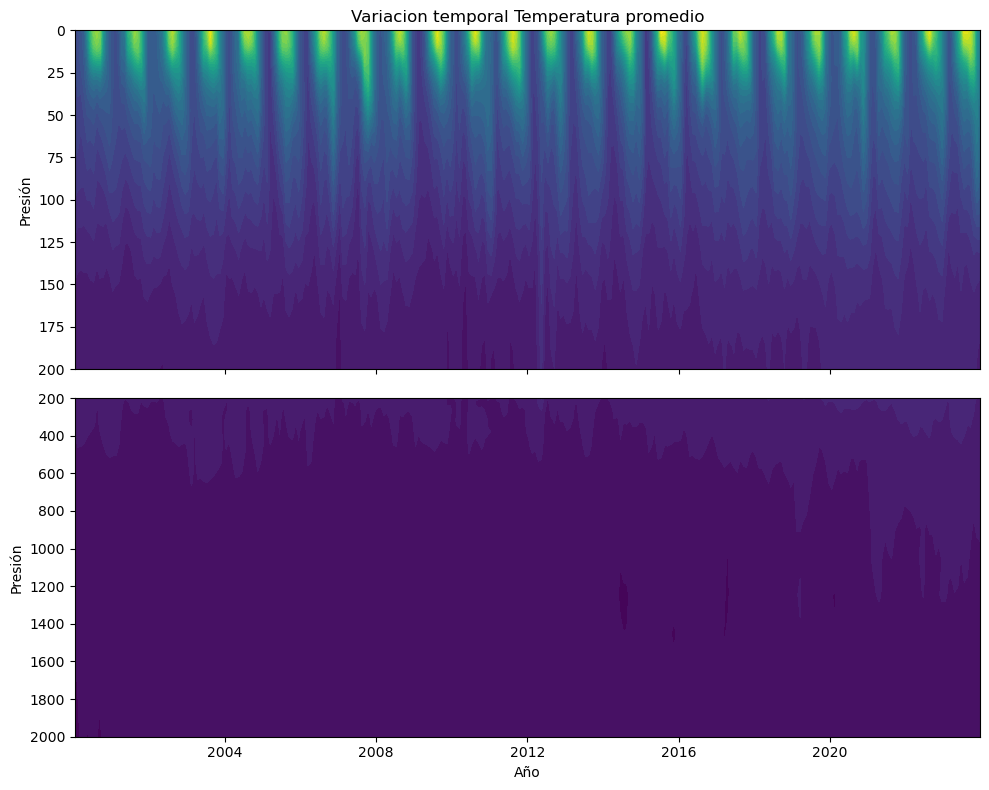

In [192]:
fig, ax = plt.subplots(2, 1 , sharex=True, figsize=(10,8))
ax[0].contourf(DC_temp_wmean.time, DC_temp_wmean.depth, 
            DC_temp_wmean.transpose(), 32)
ax[0].set_title('Variacion temporal Temperatura promedio')
ax[0].set_ylabel('Presión') 
ax[0].invert_yaxis()
ax[0].set_ylim([200,0]);

ax[1].contourf(DC_temp_wmean.time, DC_temp_wmean.depth, 
            DC_temp_wmean.transpose(), 32)
ax[1].set_ylabel('Presión') 
ax[1].set_xlabel('Año')
ax[1].invert_yaxis()
ax[1].set_ylim([2000,200]);

fig.tight_layout()
plt.savefig(imageDir+'/'+titulo_short+'_SeccionTemporal_T.png')

## Smoothed versions

In [193]:
DC_temp_wmean_rolling = DC_temp_wmean.rolling(time=12,center=True).mean()
DC_salt_wmean_rolling = DC_salt_wmean.rolling(time=12,center=True).mean()

DC_temp_anom_wmean_rolling = DC_temp_anom_wmean.rolling(time=12,center=True).mean()
DC_salt_anom_wmean_rolling = DC_salt_anom_wmean.rolling(time=12,center=True).mean()

In [194]:
Posiciones=[(0.10, 0.65, 0.8, 0.22),
            (0.10, 0.48, 0.8, 0.165),
            (0.10, 0.10, 0.8, 0.378)]

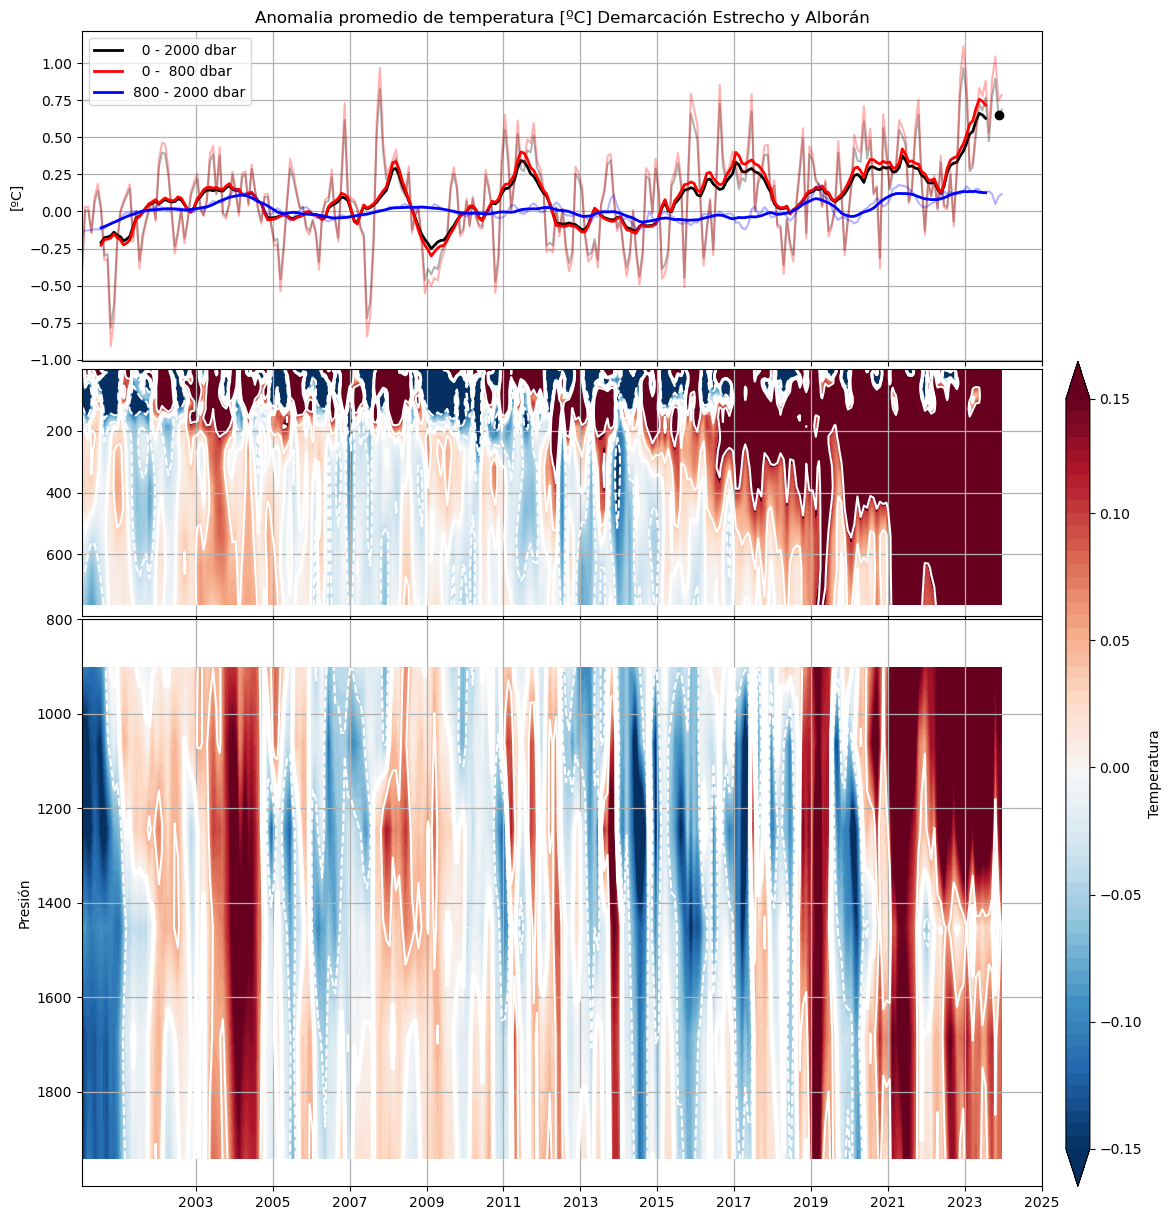

In [195]:
fig, ax = plt.subplots(3,1,figsize = (12,15),sharex=True)


# Mean values
ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(0,2000)).mean("depth"),color='k',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean.time[-2],
           DC_temp_anom_wmean.sel(depth=slice(0,2000)).mean("depth")[-2],'ko')
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(0,2000)).mean("depth"),linewidth=2,color='k',  label= '  0 - 2000 dbar')


ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(0,800)).mean("depth"),color='r',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(0,800)).mean("depth"),linewidth=2,color='r' ,  label= '  0 -  800 dbar')

ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(800,2000)).mean("depth"),color='b',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(800,2000)).mean("depth"),linewidth=2,color='b',label= '800 - 2000 dbar')
ax[0].grid(linestyle='-', linewidth=.9)
ax[0].set_position(Posiciones[0])
ax[0].legend()
ax[0].set_ylabel('[ºC]')
ax[0].set_title('Anomalia promedio de temperatura [ºC] '+titulo)

# UpperOcean
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose()
              ,colors='w',levels=[-0.15, -0.05, 0.05, 0.15] )
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose(),colors='w', linewidths=2,
              levels=[0] )

ax[1].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose(),
              cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both',vmin=-0.2, vmax=0.2)
ax[1].set_ylim(0,800)
ax[1].invert_yaxis()
ax[1].set_yticks([200,400,600])
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_position(Posiciones[1])

ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),colors='w',
              levels=[-0.05,0.05] )
ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),colors='w', linewidths=3,
              levels=[0] )
cntr2 = ax[2].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
                      DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),
                      cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both')
ax[2].set_ylim(800,2000)
ax[2].invert_yaxis()
ax[2].set_yticks([800,1000,1200,1400,1600,1800])
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_position(Posiciones[2])
ax[2].set_ylabel('Presión')

# Adding the colorbar
cbaxes = fig.add_axes([0.92, 0.1, 0.02, 0.55])  
cb = fig.colorbar(cntr2, cax=cbaxes);
cbaxes.set_yticks([-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15])
cbaxes.set_ylabel('Temperatura')

# xtick Labels
ax[0].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[1].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[2].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));

ax[2].set_xticklabels(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN').strftime('%Y'));


plt.savefig(imageDir+'/'+titulo_short+'_temp_promedio_capas.png')